<a href="https://colab.research.google.com/github/smorenorod/Python-Codes/blob/main/LTV_scenarios_POD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import requests
import json
#import pygsheets
from google.colab import auth
import gspread
from google.auth import default
import ipywidgets as widgets
from datetime import date, timedelta, datetime
import json



# Bayesian Estimation of Exponential Decay's paramers for Retention Curve

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pymc as pm
import numpy as np
import arviz as arv
import pytensor as pyt

# Retenton Tiers Calculation

In [ ]:
country=np.array(["US", "AU", "FR", "DE", "GB", "IT", "CA", "KR", "JP", "BR", "IN", "ES"])


In [ ]:
ret_go_df = []

for x in country:
  ret_go_url='https://api.sensortower.com/v1/android/usage/retention?app_ids=com.easygames.race,com.vectorunit.purple.googleplay,com.nexon.kart,com.ohbibi.sup\
  ,&date_granularity=all_time&start_date=2021-01-01&end_date=2021-04-01&country='+x+'&auth_token=yourtoken'

  response_API_go = requests.get(ret_go_url)
  content = json.loads(response_API_go.content)

  df_prov = pd.DataFrame.from_dict(content['app_data'])
  ret=df_prov.loc[:,'corrected_retention']

  ret_go=pd.DataFrame.from_dict(dict(zip(ret.index, ret.values)))
  ret_go.columns = list(df_prov['app_id'])

  ret_go.columns = ['Race_Master_3D', 'Beach_Buggy', 'Kart_Rider_Rush','SUP_Racing_game']


  ret_go['Country']=df_prov.loc[0,'country']

  ret_go['Day']=range(90)

  ret_go_df.append(ret_go)

# see pd.concat documentation for more info
ret_go_df = pd.concat(ret_go_df)

In [ ]:
ret_go_df

,Race_Master_3D,Beach_Buggy,Kart_Rider_Rush,SUP_Racing_game,Country,Day
0,0.419342,0.425481,0.406388,0.397629,US,0
1,0.341240,0.337563,0.288627,0.333213,US,1
2,0.280945,0.275752,0.209587,0.284716,US,2
3,0.235621,0.235810,0.157395,0.249656,US,3
4,0.201605,0.210805,0.122500,0.223821,US,4
...,...,...,...,...,...,...
85,0.014818,0.035090,0.036170,0.015761,ES,85
86,0.014572,0.035083,0.036163,0.015745,ES,86
87,0.014326,0.035076,0.036155,0.015728,ES,87
88,0.014080,0.035068,0.036148,0.015712,ES,88


In [ ]:
tier_1_go=ret_go_df.query("Country == 'US' | Country == 'CA' | Country == 'GB'| Country == 'AU' | Country == 'DE' | Country == 'FR'")

tier_2_go=ret_go_df.query("Country == 'JP' | Country == 'KR' | Country == 'ES'")

tier_3_go=ret_go_df.query("Country == 'BR' | Country == 'IN'")

In [ ]:
tier_1_go=tier_1_go.groupby('Day')['Race_Master_3D', 'Beach_Buggy', 'Kart_Rider_Rush','SUP_Racing_game'].mean()
tier_2_go=tier_2_go.groupby('Day')['Race_Master_3D', 'Beach_Buggy', 'Kart_Rider_Rush','SUP_Racing_game'].mean()
tier_3_go=tier_3_go.groupby('Day')['Race_Master_3D', 'Beach_Buggy', 'Kart_Rider_Rush','SUP_Racing_game'].mean()

<ipython-input-12-4103c4ea98b9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tier_1_go=tier_1_go.groupby('Day')['Race_Master_3D', 'Beach_Buggy', 'Kart_Rider_Rush','SUP_Racing_game'].mean()
<ipython-input-12-4103c4ea98b9>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tier_2_go=tier_2_go.groupby('Day')['Race_Master_3D', 'Beach_Buggy', 'Kart_Rider_Rush','SUP_Racing_game'].mean()
<ipython-input-12-4103c4ea98b9>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tier_3_go=tier_3_go.groupby('Day')['Race_Master_3D', 'Beach_Buggy', 'Kart_Rider_Rush','SUP_Racing_game'].mean()


In [ ]:
#retention numbers

from google.colab import drive
drive.mount('/drive')


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:

ret_ios_df = []

for x in country:
  ret_ios_url='https://api.sensortower.com/v1/ios/usage/retention?app_ids=1579072162,882119723,1466736988,1128327441&date_granularity=all_time&start_date=2021-01-01\
  &end_date=2021-04-01&country='+x+'&auth_token=yourtoken'

  response_API_ios = requests.get(ret_ios_url)
  content = json.loads(response_API_ios.content)

  df_prov = pd.DataFrame.from_dict(content['app_data'])

  ret=df_prov.loc[:,'corrected_retention']

  ret_ios=pd.DataFrame.from_dict(dict(zip(ret.index, ret.values)))

  if x=='JP':
   ret_ios['1466736988'] = 0
   ret_ios.columns=list(df_prov['app_id'])+[1466736988]
  else:
   ret_ios.columns = list(df_prov['app_id'])

  ret_ios.columns = ['Race_Master_3D', 'Beach_Buggy', 'Kart_Rider_Rush', 'SUP_Racing_game']

  ret_ios['Country']=df_prov.loc[0,'country']

  ret_ios['Day']=range(90)

  ret_ios_df.append(ret_ios)


# see pd.concat documentation for more info
ret_ios_df = pd.concat(ret_ios_df)

In [ ]:
ret_ios_df

,Race_Master_3D,Beach_Buggy,Kart_Rider_Rush,SUP_Racing_game,Country,Day
0,0.396601,0.404256,0.421950,0.432026,US,0
1,0.325064,0.291675,0.332994,0.352051,US,1
2,0.272944,0.215280,0.270519,0.290447,US,2
3,0.236590,0.164457,0.229961,0.244151,US,3
4,0.210871,0.130326,0.204320,0.209158,US,4
...,...,...,...,...,...,...
85,0.017061,0.035973,0.029432,0.016095,ES,85
86,0.017032,0.035966,0.029423,0.015856,ES,86
87,0.017003,0.035958,0.029414,0.015618,ES,87
88,0.016973,0.035951,0.029406,0.015380,ES,88


In [ ]:
tier_1_ios=ret_ios_df.query("Country == 'US' | Country == 'CA' | Country == 'GB'| Country == 'AU' | Country == 'DE' | Country == 'FR'")

tier_2_ios=ret_ios_df.query("Country == 'JP' | Country == 'KR' | Country == 'ES'")

tier_3_ios=ret_ios_df.query("Country == 'BR' | Country == 'IN'")

In [ ]:
tier_1_ios=tier_1_ios.groupby('Day')['Race_Master_3D', 'Beach_Buggy', 'Kart_Rider_Rush','SUP_Racing_game'].mean()
tier_2_ios=tier_2_ios.groupby('Day')['Race_Master_3D', 'Beach_Buggy', 'Kart_Rider_Rush','SUP_Racing_game'].mean()
tier_3_ios=tier_3_ios.groupby('Day')['Race_Master_3D', 'Beach_Buggy', 'Kart_Rider_Rush','SUP_Racing_game'].mean()

<ipython-input-17-30b3cb0d49ec>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tier_1_ios=tier_1_ios.groupby('Day')['Race_Master_3D', 'Beach_Buggy', 'Kart_Rider_Rush','SUP_Racing_game'].mean()
<ipython-input-17-30b3cb0d49ec>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tier_2_ios=tier_2_ios.groupby('Day')['Race_Master_3D', 'Beach_Buggy', 'Kart_Rider_Rush','SUP_Racing_game'].mean()
<ipython-input-17-30b3cb0d49ec>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tier_3_ios=tier_3_ios.groupby('Day')['Race_Master_3D', 'Beach_Buggy', 'Kart_Rider_Rush','SUP_Racing_game'].mean()


In [ ]:
tier_2_ios

,Race_Master_3D,Beach_Buggy,Kart_Rider_Rush,SUP_Racing_game
Day,,,,
0,0.432346,0.458748,0.517038,0.329651
1,0.356500,0.308767,0.404920,0.264179
2,0.296957,0.218753,0.328983,0.215835
3,0.251807,0.166037,0.279586,0.181667
4,0.218522,0.134556,0.247172,0.157368
...,...,...,...,...
85,0.028882,0.039108,0.056450,0.011557
86,0.028867,0.039100,0.056095,0.011458
87,0.028853,0.039092,0.055740,0.011360


In [ ]:
#retention numbers

from google.colab import drive
drive.mount('/drive')


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
tier_1_go.loc[:,'Race_Master_3D'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"Race_Master_3D_go_1"+'.csv', index =False)
tier_2_go.loc[:,'Race_Master_3D'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"Race_Master_3D_go_2"+'.csv', index =False)
tier_3_go.loc[:,'Race_Master_3D'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"Race_Master_3D_go_3"+'.csv', index =False)
tier_1_ios.loc[:,'Race_Master_3D'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"Race_Master_3D_ios_1"+'.csv', index =False)
tier_2_ios.loc[:,'Race_Master_3D'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"Race_Master_3D_ios_2"+'.csv', index =False)
tier_3_ios.loc[:,'Race_Master_3D'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"Race_Master_3D_ios_3"+'.csv', index =False)

In [ ]:
tier_1_go.loc[:,'Beach_Buggy'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"Beach_Buggy_go_1"+'.csv', index =False)
tier_2_go.loc[:,'Beach_Buggy'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"Beach_Buggy_go_2"+'.csv', index =False)
tier_3_go.loc[:,'Beach_Buggy'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"Beach_Buggy_go_3"+'.csv', index =False)
tier_1_ios.loc[:,'Beach_Buggy'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"Beach_Buggy_ios_1"+'.csv', index =False)
tier_2_ios.loc[:,'Beach_Buggy'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"Beach_Buggy_ios_2"+'.csv', index =False)
tier_3_ios.loc[:,'Beach_Buggy'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"Beach_Buggy_ios_3"+'.csv', index =False)

In [ ]:
tier_1_go.loc[:,'Kart_Rider_Rush'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"Kart_Rider_Rush_go_1"+'.csv', index =False)
tier_2_go.loc[:,'Kart_Rider_Rush'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"Kart_Rider_Rush_go_2"+'.csv', index =False)
tier_3_go.loc[:,'Kart_Rider_Rush'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"Kart_Rider_Rush_go_3"+'.csv', index =False)
tier_1_ios.loc[:,'Kart_Rider_Rush'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"Kart_Rider_Rush_ios_1"+'.csv', index =False)
tier_2_ios.loc[:,'Kart_Rider_Rush'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"Kart_Rider_Rush_ios_2"+'.csv', index =False)
tier_3_ios.loc[:,'Kart_Rider_Rush'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"Kart_Rider_Rush_ios_3"+'.csv', index =False)

In [ ]:
tier_1_go.loc[:,'SUP_Racing_game'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"SUP_Racing_game_go_1"+'.csv', index =False)
tier_2_go.loc[:,'SUP_Racing_game'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"SUP_Racing_game_go_2"+'.csv', index =False)
tier_3_go.loc[:,'SUP_Racing_game'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"SUP_Racing_game_go_3"+'.csv', index =False)
tier_1_ios.loc[:,'SUP_Racing_game'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"SUP_Racing_game_ios_1"+'.csv', index =False)
tier_2_ios.loc[:,'SUP_Racing_game'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"SUP_Racing_game_ios_2"+'.csv', index =False)
tier_3_ios.loc[:,'SUP_Racing_game'].to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"SUP_Racing_game_ios_3"+'.csv', index =False)

In [ ]:
# Mixture


# initialize list of lists
data = [['Race_Master_3D',0.7803041347], ['Beach_Buggy', 0.2135478195], ['Kart_Rider_Rush', 0.004245318587], ['SUP_Racing_game', 0.001902727158]]

# Create the pandas DataFrame
mixture = pd.DataFrame(data, columns=['Game', 'Pct'])


mixture

,Game,Pct
0,Race_Master_3D,0.780304
1,Beach_Buggy,0.213548
2,Kart_Rider_Rush,0.004245
3,SUP_Racing_game,0.001903


In [ ]:
#Unified retention Go

ret_unif_go_tier1=pd.DataFrame(columns=['Total_Retention'])

ret_unif_go_tier2=pd.DataFrame(columns=['Total_Retention'])

ret_unif_go_tier3=pd.DataFrame(columns=['Total_Retention'])


ret_unif_go_tier1['Total_Retention']=tier_1_go['Race_Master_3D']*mixture.iloc[0,1]+tier_1_go['Beach_Buggy']*mixture.iloc[1,1]+tier_1_go['Kart_Rider_Rush']*mixture.iloc[2,1]+tier_1_go['SUP_Racing_game']*mixture.iloc[3,1]

ret_unif_go_tier2['Total_Retention']=tier_2_go['Race_Master_3D']*mixture.iloc[0,1]+tier_2_go['Beach_Buggy']*mixture.iloc[1,1]+tier_2_go['Kart_Rider_Rush']*mixture.iloc[2,1]+tier_2_go['SUP_Racing_game']*mixture.iloc[3,1]

ret_unif_go_tier3['Total_Retention']=tier_3_go['Race_Master_3D']*mixture.iloc[0,1]+tier_3_go['Beach_Buggy']*mixture.iloc[1,1]+tier_3_go['Kart_Rider_Rush']*mixture.iloc[2,1]+tier_3_go['SUP_Racing_game']*mixture.iloc[3,1]




In [ ]:
#Unified retention ios

ret_unif_ios_tier1=pd.DataFrame(columns=['Total_Retention'])

ret_unif_ios_tier2=pd.DataFrame(columns=['Total_Retention'])

ret_unif_ios_tier3=pd.DataFrame(columns=['Total_Retention'])


ret_unif_ios_tier1['Total_Retention']=tier_1_ios['Race_Master_3D']*mixture.iloc[0,1]+tier_1_ios['Beach_Buggy']*mixture.iloc[1,1]+tier_1_ios['Kart_Rider_Rush']*mixture.iloc[2,1]+tier_1_ios['SUP_Racing_game']*mixture.iloc[3,1]
ret_unif_ios_tier2['Total_Retention']=tier_2_ios['Race_Master_3D']*mixture.iloc[0,1]+tier_2_ios['Beach_Buggy']*mixture.iloc[1,1]+tier_1_ios['Kart_Rider_Rush']*mixture.iloc[2,1]+tier_1_ios['SUP_Racing_game']*mixture.iloc[3,1]
ret_unif_ios_tier3['Total_Retention']=tier_3_ios['Race_Master_3D']*mixture.iloc[0,1]+tier_3_ios['Beach_Buggy']*mixture.iloc[1,1]+tier_1_ios['Kart_Rider_Rush']*mixture.iloc[2,1]+tier_1_ios['SUP_Racing_game']*mixture.iloc[3,1]



# Bayesian Estimation of Exponential Decay's paramers for Retention Curve

In [ ]:
!pip install Pytensor

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pymc as pm
import numpy as np
import arviz as arv
import pytensor as pyt

In [ ]:
print(pm.__version__)

5.7.2


In [ ]:
def fn_μ_t(θ_t, μ_previous):
    μ = μ_previous*pm.math.exp(-θ_t)
    return μ

In [ ]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


## Tier 1 google

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
ERROR:pymc.stats.convergence:There were 118 divergences after tuning. Increase `target_accept` or reparameterize.


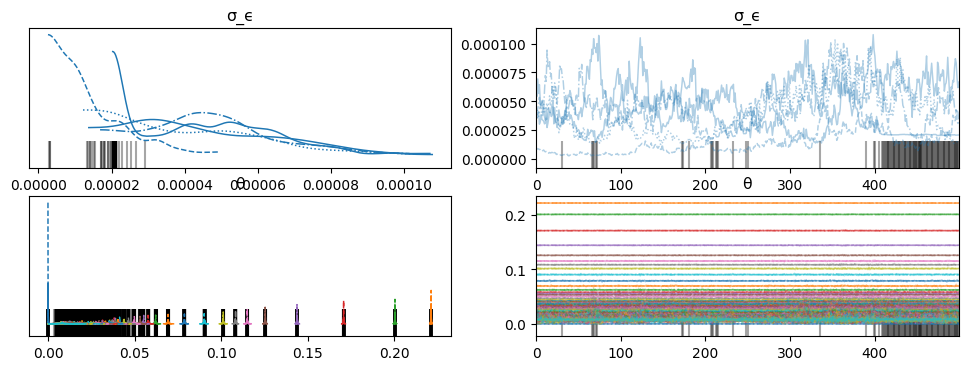

In [ ]:
y = ret_unif_go_tier1.iloc[:,0] #np.array([0.491700486,	0.359814429,	0.273621994,	0.219318285,	0.184230865,	0.159618344,	0.141096513,	0.126114328,	0.114070134,	0.104278939])

with pm.Model() as m5:
    σ_ϵ = pm.HalfNormal('σ_ϵ', 0.5)
    θ=pm.Uniform("θ", 0, 1, shape=len(y))
    #θ = pm.Uniform('θ', 0,1,, shape=len(y))
    #σ_ϵ = pm.HalfNormal('ξ', mu=0, sigma=σ_ϵ * (1- smth_parm), shape=len(y))
    μ_1 = pyt.shared(y[0])

    μ, updates = pyt.scan(fn=fn_μ_t,
                                    sequences = [θ],
                                    outputs_info = [μ_1],
                                    n_steps=len(y))

    #sigma=pm.Uniform("sigma", 0.1, pm.math.sqrt(μ * (1 - μ)))


    #level = pm.Normal('level', mu=μ, sigma=σ_ϵ * smth_parm, observed=y)
    level = pm.Beta("level", mu = μ, sigma = σ_ϵ,observed =y)
    #pred = pm.MutableData("pred", y[89])
    trace = pm.sample(500,
                      target_accept=0.95,
                      cores=5,
                      init='advi+adapt_diag',
                      tune=3000)
arv.plot_trace(trace);

In [ ]:
trace_summary = arv.summary(trace)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
σ_ϵ,0.000,0.000,0.000,0.000,0.0,0.0,3.0,31.0,1.92
θ[0],0.000,0.000,0.000,0.000,0.0,0.0,3.0,39.0,1.79
θ[1],0.221,0.000,0.221,0.222,0.0,0.0,18.0,54.0,1.74
θ[2],0.200,0.000,0.200,0.201,0.0,0.0,442.0,81.0,1.76
θ[3],0.171,0.000,0.170,0.171,0.0,0.0,513.0,74.0,1.74
...,...,...,...,...,...,...,...,...,...
θ[85],0.008,0.002,0.002,0.012,0.0,0.0,443.0,127.0,1.83
θ[86],0.008,0.002,0.002,0.013,0.0,0.0,626.0,83.0,1.81
θ[87],0.008,0.002,0.002,0.012,0.0,0.0,447.0,63.0,1.72
θ[88],0.008,0.003,0.002,0.013,0.0,0.0,603.0,90.0,1.74


In [ ]:
trace_summary.to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"trace_summary_go_1_POD2"+'.csv', index =False)

## Tier 2 google

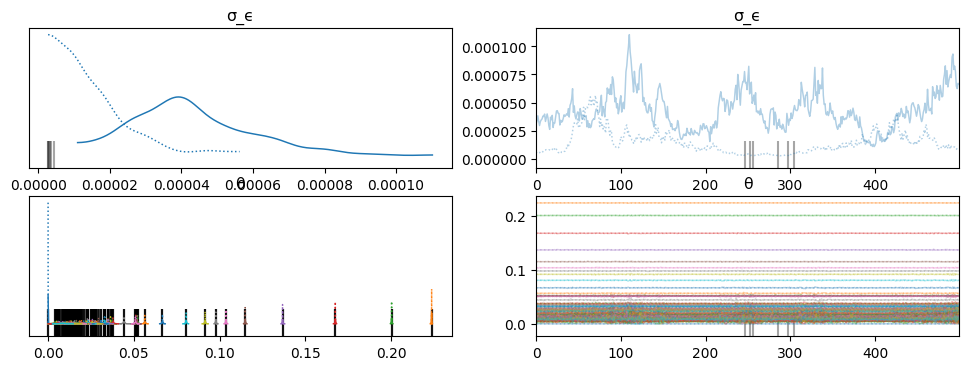

In [ ]:
y = ret_unif_go_tier2.iloc[:,0] #np.array([0.491700486,	0.359814429,	0.273621994,	0.219318285,	0.184230865,	0.159618344,	0.141096513,	0.126114328,	0.114070134,	0.104278939])

with pm.Model() as m5:
    σ_ϵ = pm.HalfNormal('σ_ϵ', 0.5)
    θ=pm.Uniform("θ", 0, 1, shape=len(y))
    #θ = pm.Uniform('θ', 0,1,, shape=len(y))
    #σ_ϵ = pm.HalfNormal('ξ', mu=0, sigma=σ_ϵ * (1- smth_parm), shape=len(y))
    μ_1 = pyt.shared(y[0])

    μ, updates = pyt.scan(fn=fn_μ_t,
                                    sequences = [θ],
                                    outputs_info = [μ_1],
                                    n_steps=len(y))

    #sigma=pm.Uniform("sigma", 0.1, pm.math.sqrt(μ * (1 - μ)))


    #level = pm.Normal('level', mu=μ, sigma=σ_ϵ * smth_parm, observed=y)
    level = pm.Beta("level", mu = μ, sigma = σ_ϵ,observed =y)
    #pred = pm.MutableData("pred", y[89])
    trace_go_2 = pm.sample(500,
                      target_accept=0.95,
                      init='advi+adapt_diag',
                      tune=3000)
arv.plot_trace(trace_go_2);

In [ ]:
trace_summary_go_2 = arv.summary(trace_go_2)

In [ ]:
trace_summary_go_2.to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"trace_summary_go_2_POD2"+'.csv', index =False)

## Tier 3 google

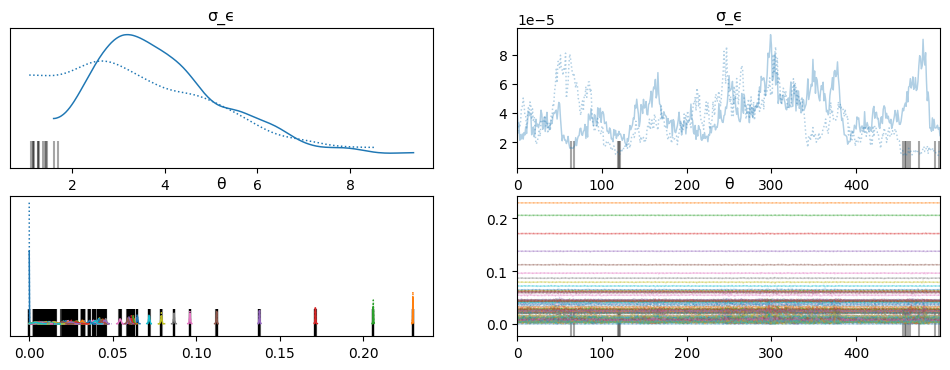

In [ ]:
y = ret_unif_go_tier3.iloc[:,0] #np.array([0.491700486,	0.359814429,	0.273621994,	0.219318285,	0.184230865,	0.159618344,	0.141096513,	0.126114328,	0.114070134,	0.104278939])

with pm.Model() as m5:
    σ_ϵ = pm.HalfNormal('σ_ϵ', 0.5)
    θ=pm.Uniform("θ", 0, 1, shape=len(y))
    #θ = pm.Uniform('θ', 0,1,, shape=len(y))
    #σ_ϵ = pm.HalfNormal('ξ', mu=0, sigma=σ_ϵ * (1- smth_parm), shape=len(y))
    μ_1 = pyt.shared(y[0])

    μ, updates = pyt.scan(fn=fn_μ_t,
                                    sequences = [θ],
                                    outputs_info = [μ_1],
                                    n_steps=len(y))

    #sigma=pm.Uniform("sigma", 0.1, pm.math.sqrt(μ * (1 - μ)))


    #level = pm.Normal('level', mu=μ, sigma=σ_ϵ * smth_parm, observed=y)
    level = pm.Beta("level", mu = μ, sigma = σ_ϵ,observed =y)
    #pred = pm.MutableData("pred", y[89])
    trace_go_3 = pm.sample(500,
                      target_accept=0.95,
                      init='advi+adapt_diag',
                      tune=3000)
arv.plot_trace(trace_go_3);

In [ ]:
trace_summary_go_3 = arv.summary(trace_go_3)

In [ ]:
trace_summary_go_3.to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"trace_summary_go_3_POD2"+'.csv', index =False)

## Tier 1 iOS

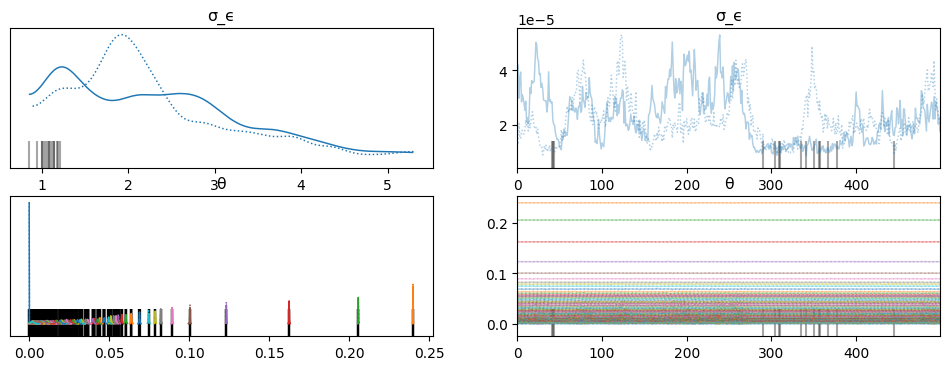

In [ ]:
y = ret_unif_ios_tier1.iloc[:,0] #np.array([0.491700486,	0.359814429,	0.273621994,	0.219318285,	0.184230865,	0.159618344,	0.141096513,	0.126114328,	0.114070134,	0.104278939])

with pm.Model() as m5:
    σ_ϵ = pm.HalfNormal('σ_ϵ', 0.5)
    θ=pm.Uniform("θ", 0, 1, shape=len(y))
    #θ = pm.Uniform('θ', 0,1,, shape=len(y))
    #σ_ϵ = pm.HalfNormal('ξ', mu=0, sigma=σ_ϵ * (1- smth_parm), shape=len(y))
    μ_1 = pyt.shared(y[0])

    μ, updates = pyt.scan(fn=fn_μ_t,
                                    sequences = [θ],
                                    outputs_info = [μ_1],
                                    n_steps=len(y))

    #sigma=pm.Uniform("sigma", 0.1, pm.math.sqrt(μ * (1 - μ)))


    #level = pm.Normal('level', mu=μ, sigma=σ_ϵ * smth_parm, observed=y)
    level = pm.Beta("level", mu = μ, sigma = σ_ϵ,observed =y)
    #pred = pm.MutableData("pred", y[89])
    trace_ios_1 = pm.sample(500,
                      target_accept=0.95,
                      init='advi+adapt_diag',
                      tune=3000)
arv.plot_trace(trace_ios_1);

In [ ]:
trace_summary_ios_1 = arv.summary(trace_ios_1)

In [ ]:
trace_summary_ios_1.to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"trace_summary_ios_1_POD2"+'.csv', index =False)

## Tier 2 iOS

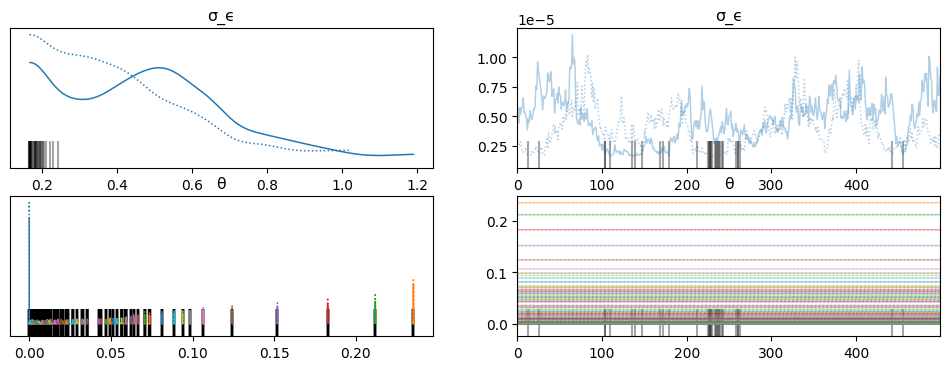

In [ ]:
y = ret_unif_ios_tier2.iloc[:,0] #np.array([0.491700486,	0.359814429,	0.273621994,	0.219318285,	0.184230865,	0.159618344,	0.141096513,	0.126114328,	0.114070134,	0.104278939])

with pm.Model() as m5:
    σ_ϵ = pm.HalfNormal('σ_ϵ', 0.5)
    θ=pm.Uniform("θ", 0, 1, shape=len(y))
    #θ = pm.Uniform('θ', 0,1,, shape=len(y))
    #σ_ϵ = pm.HalfNormal('ξ', mu=0, sigma=σ_ϵ * (1- smth_parm), shape=len(y))
    μ_1 = pyt.shared(y[0])

    μ, updates = pyt.scan(fn=fn_μ_t,
                                    sequences = [θ],
                                    outputs_info = [μ_1],
                                    n_steps=len(y))

    #sigma=pm.Uniform("sigma", 0.1, pm.math.sqrt(μ * (1 - μ)))


    #level = pm.Normal('level', mu=μ, sigma=σ_ϵ * smth_parm, observed=y)
    level = pm.Beta("level", mu = μ, sigma = σ_ϵ,observed =y)
    #pred = pm.MutableData("pred", y[89])
    trace_ios_2 = pm.sample(500,
                      target_accept=0.95,
                      init='advi+adapt_diag',
                      tune=3000)
arv.plot_trace(trace_ios_2);

In [ ]:
trace_summary_ios_2 = arv.summary(trace_ios_2)

In [ ]:
trace_summary_ios_2.to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"trace_summary_ios_2_POD2"+'.csv', index =False)

## Tier 3 iOS

In [ ]:
y = ret_unif_ios_tier3.iloc[:,0] #np.array([0.491700486,	0.359814429,	0.273621994,	0.219318285,	0.184230865,	0.159618344,	0.141096513,	0.126114328,	0.114070134,	0.104278939])

with pm.Model() as m5:
    σ_ϵ = pm.HalfNormal('σ_ϵ', 0.5)
    θ=pm.Uniform("θ", 0, 1, shape=len(y))
    #θ = pm.Uniform('θ', 0,1,, shape=len(y))
    #σ_ϵ = pm.HalfNormal('ξ', mu=0, sigma=σ_ϵ * (1- smth_parm), shape=len(y))
    μ_1 = pyt.shared(y[0])

    μ, updates = pyt.scan(fn=fn_μ_t,
                                    sequences = [θ],
                                    outputs_info = [μ_1],
                                    n_steps=len(y))

    #sigma=pm.Uniform("sigma", 0.1, pm.math.sqrt(μ * (1 - μ)))


    #level = pm.Normal('level', mu=μ, sigma=σ_ϵ * smth_parm, observed=y)
    level = pm.Beta("level", mu = μ, sigma = σ_ϵ,observed =y)
    #pred = pm.MutableData("pred", y[89])
    trace_ios_3 = pm.sample(500,
                      target_accept=0.95,
                      init='advi+adapt_diag',
                      tune=3000)
arv.plot_trace(trace_ios_3);

In [ ]:
trace_summary_ios_3 = arv.summary(trace_ios_3)

In [ ]:
trace_summary_ios_3.to_csv('/drive/My Drive/Colab Notebooks/LTV_Ret_Decay_param_est/'+"trace_summary_ios_3_POD2"+'.csv', index =False)